In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the account-level data
df = pd.read_csv("Prompt1AccountLevel.csv")

# (Optional) Inspect the columns to ensure proper order and names
print(df.columns.tolist())
df.head()


['AccountNumber', 'Season', 'SingleGameTickets', 'PartialPlanTickets', 'GroupTickets', 'STM', 'AvgSpend', 'GamesAttended', 'FanSegment', 'DistanceToArena', 'BasketballPropensity', 'SocialMediaEngagement', 'A Games', 'B Games', 'C Games', 'D Games', 'Weekend Games', 'Weekday Games', 'Promotional Games', 'Non Promo Games', 'A + Weekend + Promo', 'A + Weekend + nonPromo', 'A + Weekday + Promo', 'A + Weekday + nonPromo', 'B + Weekend + Promo', 'B + Weekend + nonPromo', 'B + Weekday + Promo', 'B + Weekday + nonPromo', 'C + Weekend + Promo', 'C + Weekend + nonPromo', 'C + Weekday + Promo', 'C + Weekday + nonPromo', 'D + Weekend + Promo', 'D + Weekend + nonPromo', 'D + Weekday + Promo', 'D + Weekday + nonPromo', 'NumGamesAttend']


,AccountNumber,Season,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,...,B + Weekday + nonPromo,C + Weekend + Promo,C + Weekend + nonPromo,C + Weekday + Promo,C + Weekday + nonPromo,D + Weekend + Promo,D + Weekend + nonPromo,D + Weekday + Promo,D + Weekday + nonPromo,NumGamesAttend
0,1,2023,0,0,0,0,$467.00,1,F,12.0,...,0,0,0,0,0,0,0,24,0,1
1,2,2023,2,0,0,0,$95.00,1,A,47.0,...,0,0,0,0,0,0,0,0,0,1
2,3,2023,3,0,0,0,$107.00,1,B,6.0,...,0,0,0,0,0,0,0,0,3,1
3,4,2023,0,0,3,0,$27.00,1,C,3.0,...,0,0,0,0,0,0,0,0,3,1
4,5,2023,0,0,2,0,$14.00,1,A,4.0,...,0,0,0,0,0,0,0,0,2,1


In [2]:
# Define a function to compute the dominant tier from the counts
def get_dominant_tier(row):
    tiers = {"A": row["A Games"], "B": row["B Games"], "C": row["C Games"], "D": row["D Games"]}
    # Return the tier with the highest count.
    # (If there is a tie, max() returns the first one encountered.)
    return max(tiers, key=tiers.get)

# Apply the function row-wise to create a new column 'DominantTier'
df["DominantTier"] = df.apply(get_dominant_tier, axis=1)

# Check the new column
df[["AccountNumber", "A Games", "B Games", "C Games", "D Games", "DominantTier"]].head()


,AccountNumber,A Games,B Games,C Games,D Games,DominantTier
0,1,0,0,0,24,D
1,2,2,0,0,0,A
2,3,0,0,0,3,D
3,4,0,0,0,3,D
4,5,0,0,0,2,D


In [3]:
# Select all columns from "A Games" to "NumGamesAttend"
pca_cols = df.loc[:, "A Games":"NumGamesAttend"]

# Standardize the data (important for PCA and t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_cols)

print("Shape of the data for PCA/t-SNE:", X_scaled.shape)


Shape of the data for PCA/t-SNE: (44211, 25)


Explained Variance Ratio: [0.66944775 0.07730257]


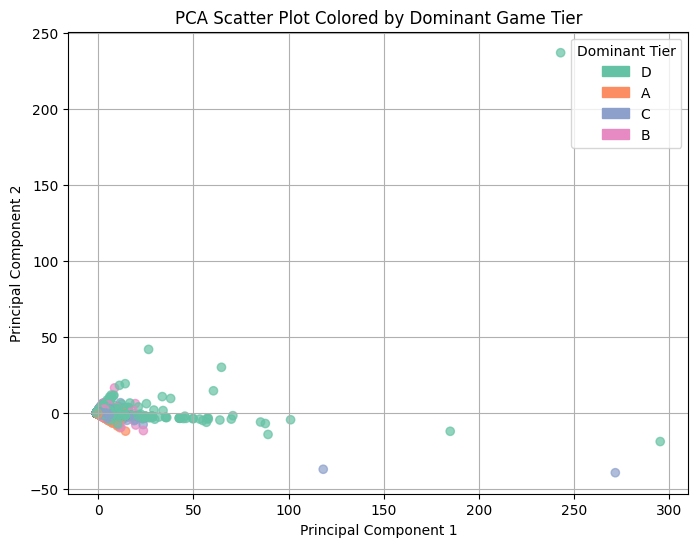

In [4]:
# Run PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratios for information
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Create a color map for the DominantTier categories
unique_tiers = df["DominantTier"].unique()
colors_tier = sns.color_palette("Set2", len(unique_tiers))
tier_color_map = dict(zip(unique_tiers, colors_tier))
# Map each row's DominantTier to a color
point_colors = df["DominantTier"].map(tier_color_map)

# Plot PCA results, color-coded by DominantTier
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=point_colors, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot Colored by Dominant Game Tier")
plt.grid(True)

# Create legend handles
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=tier_color_map[tier], label=tier) for tier in unique_tiers]
plt.legend(handles=patches, title="Dominant Tier", loc="best")
plt.show()


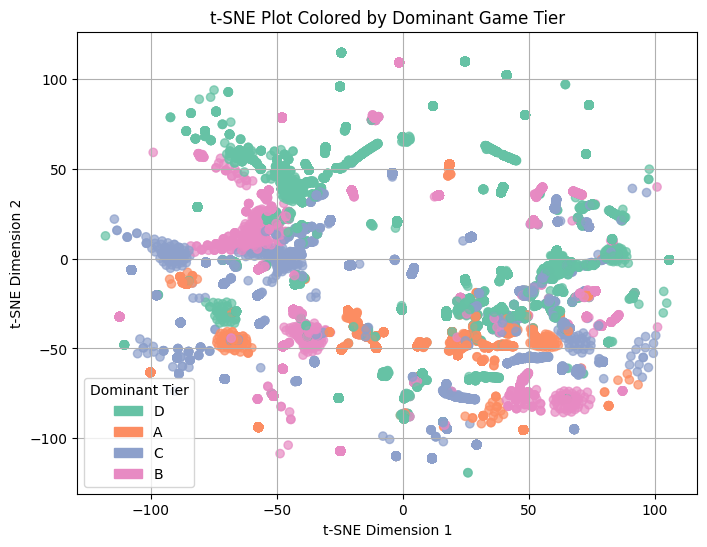

In [5]:
# Run t-SNE (reduce to 2 components)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results, color-coded by DominantTier
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=point_colors, alpha=0.7)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Plot Colored by Dominant Game Tier")
plt.grid(True)

# Legend (reuse the same patches as before)
plt.legend(handles=patches, title="Dominant Tier", loc="best")
plt.show()
